# Pendarahan Postpartum pada Ibu Hamil
Angka kematian ibu adalah salah satu indikator dalam menentukan derajat kesehatan. Penyebab kematian ibu 
terbanyak pada tahun 2011 adalah perdarahan post partum. Postpartum adalah periode setelah seorang wanita melahirkan, sering dikenal sebagai masa pasca-melahirkan. Biasanya, periode ini mencakup enam minggu pertama setelah kelahiran, meskipun beberapa efek fisik dan emosional bisa berlangsung lebih lama.
Menurut penelitian dari jurnal Unair, beberapa faktor penyebab pendarahan 'post partum' adalah umur, paritas, dan anemia.

Jurnal tersebut menggunakan Uji pengaruh antar variabel dengan uji regresi logistik ganda dengan hasil 
usia dengan p = 0,000 nilai Exp (B) = 0,050 anemia p = 0,016 nilai Exp (B) = 
0,078 Sedangkan faktor yang tidak berpengaruh adalah paritas.

[link jurnal](https://journal.unair.ac.id/download-fullpapers-jbk82be4db4e42full.pdf#:~:text=Faktor%20predisposisi%20perdarahan%20post%20partum%20ibu%20adalah%20umur,%20paritas,%20jarak
)

namun atribut yang digunakan pada file ipynb disini adalah usia dan paritas, karena atribut anemia tidak ada.

penjelasan kolom pada tabel dataset:
- paritas: jumlah anak yang dimiliki, paritas I, II, III, dan IV
- jarak kelahiran: jarak kelahiran anak terakhir dengan anak sebelumnya
- RIW hipertensi: riwayat hipertensi
- RIW PE: 
- RIW DM: riwayat diabetes melitus
- sosek: sosial ekonommi atau pendapatan 

## Exploratory Data Analysis
pada experiment kali ini, saya hanya akan melakukan eda karena kurangnya pemahaman di domain kesehatan dan ingin mencari tahu 
tentang pemahaman dataset.  
EDA yang dilakukan meliputi uji korelasi antara 2 variabel bebas, plotting, dll.

Setelah melakukan eda, pada tahap berikutnya mungkin kedepannya akan dilakukan unsupervised learning berupa klasterisasi  

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel("datakasus-1.xlsx", index_col='NO')
df.drop(columns=["NAMA", "JARAK KELAHIRAN", "RIW HIPERTENSI", "RIW PE", "OBESITAS", "RIW DM", "RIW HIPERTENSI/PE DALAM KELUARGA", "SOSEK RENDAH", "PE/Non PE"], inplace=True)
df = df[["USIA", "PARITAS"]]
df

,USIA,PARITAS
NO,,
1,23 TH,3
2,29 TH,2
3,20 TH,1
4,18 TH,1
5,34 TH,3
...,...,...
558,40 TH,3
559,28 TH,3
560,41 TH,3


### Mengubah datatype kolom Usia 
datatype pada kolom usia perlu diubah dari `str` atau `nan` menjadi `int`

In [15]:
# Fungsi untuk membersihkan dan mengkonversi data usia

# case:
    # str:
        # xx th or xxth or xx TH
    # int
    # nan
# NaN, 34 th, 34 TH, 34th, 34TH

def clean(usia):
    if type(usia) == int:
        return usia
    if usia == np.NAN:
        return np.NAN
    if type(usia) == str:
        return int(usia[:2])
    return

df["USIA"] = df["USIA"].apply(clean)
df["USIA"] = df["USIA"].fillna(0).astype("Int64")
# df.dropna(axis='index', inplace=True)
print(df.isna().mean())



USIA       0.0
PARITAS    0.0
dtype: float64


In [20]:
print(df.query("USIA == 0"))

     USIA  PARITAS
NO                
101     0        1
102     0        1
264     0        1


C:\Users\Bagas\AppData\Local\Temp\ipykernel_12556\236980237.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print(df.query("USIA == 0"))


In [21]:
df.dtypes

USIA       Int64
PARITAS    int64
dtype: object

In [22]:
df.describe()

,USIA,PARITAS
count,561.0,561.000000
mean,28.003565,1.709447
std,6.255282,1.012105
min,0.0,0.000000
25%,24.0,1.000000
50%,28.0,2.000000
75%,32.0,2.000000
max,43.0,6.000000


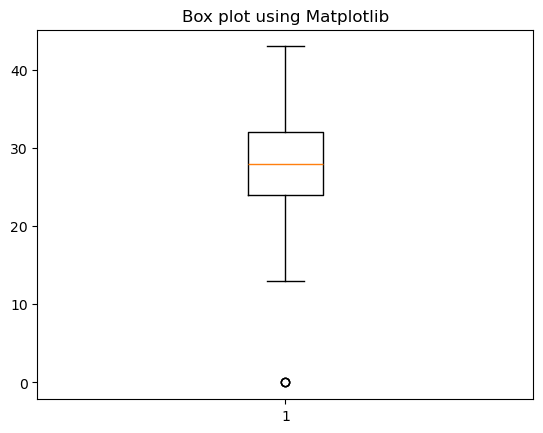

In [23]:
# mencari oulier dengan boxplot
plt.boxplot(df["USIA"])
# plt.boxplot(df["USIA"])
plt.title('Box plot using Matplotlib')
plt.show()

In [41]:
# handle outlier with iqr
# get q1
q1 = df["USIA"].quantile(0.25)
q3 = df["USIA"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, " ", upper_bound)
# lower_bound, upper_bound
# outlier = df[(df["USIA"] < lower_bound) | (df["USIA"] > upper_bound)]
df = df[df["USIA"] > lower_bound]
df = df[df["USIA"] < upper_bound]



# df["USIA"] = np.where((df["USIA"] < lower_bound) | df["USIA"] > upper_bound, mean, df["USIA"])
# menghapus baris yang bernilai 0
# # df = df[df["USIA"] > 0]
# df.query("USIA == 0")
print("under q1: ", df.query("USIA < @lower_bound"), " upper q3: ", df.query("USIA > @upper_bound"))
# df.loc[101:105, "USIA"]
df.describe()

12.0   44.0
under q1:  Empty DataFrame
Columns: [USIA, PARITAS]
Index: []  upper q3:  Empty DataFrame
Columns: [USIA, PARITAS]
Index: []


,USIA,PARITAS
count,558.000000,558.000000
mean,28.154122,1.713262
std,5.923926,1.013483
min,13.000000,0.000000
25%,24.000000,1.000000
50%,28.000000,2.000000
75%,32.000000,2.000000
max,43.000000,6.000000


langkah diatas perlu dilakukan untuk menghilangkan nilai outlier, seperti 0, dsb. 
berdasarkan output, dapat disimpulkan bahwa data tersebut sudah bersih dari outlier

### Uji korelasi
Uji korelasi adalah metode statistik yang digunakan untuk menentukan apakah ada hubungan antara dua variabel, dan seberapa kuat hubungan tersebut. Korelasi diukur dengan koefisien korelasi yang berkisar antara -1 hingga 1. Nilai 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi.
Ada berbagai jenis uji korelasi, seperti Pearson's Correlation, Spearman's Rank Correlation, dan Kendall's Tau.

Uji korelasi akan dilakukan pada atribut usia dan paritas karena diduga keduanya memiliki pengaruh.
Hal ini didasarkan karena jika label x dan y memiliki nilai y = Ax dan y dan z memiliki nilai y = Bz, maka x, y, dan z, dapat 
dikonstruksi menjadi `y = Ax + Bz`
Maka x dan z memiliki hubungan nilai `z = (y - Ax)/B`

Uji korelasi yang dilakukan menggunakan spearman karena akan dicari hubungan antara atribut usia bertipe interval dengan atribut paritas yang bertipe ordinal

In [43]:
from scipy.stats import spearmanr

rank_corr = spearmanr(df["USIA"].values, df["PARITAS"].values)
print(rank_corr)

SignificanceResult(statistic=0.5267314935634082, pvalue=3.728629016120664e-41)


hasil statistik dari uji korelasi spearman yang > 0, menunjukkan bahwa ada korelasi positif antara paritas dengan usia